# Исследование продуктовых гипотез

Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

1. **Данные для первой части**
*Файл /datasets/hypothesis.csv*
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
2. **Данные для второй части**
*Файл /datasets/orders.csv*
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

*Файл /datasets/visitors.csv*
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Изучение данных из файлов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})

import scipy.stats as stats
from scipy import stats as st

import math

import numpy as np

pd.set_option('display.max_colwidth', 0) #полное название столбцов

In [2]:
# чтение файла с данными и сохранение в датафреймы
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
hypothesis.head(5)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
orders.info

<bound method DataFrame.info of       transactionId   visitorId        date  revenue group
0     3667963787     3312258926  2019-08-15  1650     B   
1     2804400009     3642806036  2019-08-15  730      B   
2     2961555356     4069496402  2019-08-15  400      A   
3     3797467345     1196621759  2019-08-15  9759     B   
4     2282983706     2322279887  2019-08-15  2308     B   
...          ...            ...         ...   ...    ..   
1192  2662137336     3733762160  2019-08-14  6490     B   
1193  2203539145     370388673   2019-08-14  3190     A   
1194  1807773912     573423106   2019-08-14  10550    A   
1195  1947021204     1614305549  2019-08-14  100      A   
1196  3936777065     2108080724  2019-08-15  202740   B   

[1197 rows x 5 columns]>

In [7]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
#Сумма дубликатов hypothesis
hypothesis.duplicated().sum()#Сумма дубликатов hypothesis
hypothesis.duplicated().sum()

0

In [10]:
#Сумма дубликатов orders
orders.duplicated().sum()

0

In [11]:
#Сумма дубликатов visitors
visitors.duplicated().sum()

0

In [12]:
#посмотрим процент незаполненных данных по столбцам
for col in hypothesis.columns:
    pct_missing = np.mean(hypothesis[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Hypothesis - 0%
Reach - 0%
Impact - 0%
Confidence - 0%
Efforts - 0%


In [13]:
#посмотрим процент незаполненных данных по столбцам
for col in orders.columns:
    pct_missing = np.mean(orders[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

transactionId - 0%
visitorId - 0%
date - 0%
revenue - 0%
group - 0%


In [14]:
#посмотрим процент незаполненных данных по столбцам
for col in visitors.columns:
    pct_missing = np.mean(visitors[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

date - 0%
group - 0%
visitors - 0%


Необходимо: 
1. Привести названия столбцов к нижнему регистру в hypothesis
2. Привести к формату date столбец date в orders
3. Привести к формату date столбец date в visitors
4. Привести названия столбцов к нижнему регистру в orders

## Подготовка данных

In [15]:
# приведение к нижнему регистру столбцов
hypothesis.columns = hypothesis.columns.str.lower()

In [16]:
hypothesis.head(5)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [17]:
# приведение к формату date столбец date в orders
orders['date'] = pd.to_datetime(orders['date']).dt.date

In [18]:
# приведение к формату date столбец date в visitors
visitors['date'] = pd.to_datetime(visitors['date']).dt.date

In [19]:
# приведение к нижнему регистру столбцов
orders.columns = orders.columns.str.lower()

In [20]:
orders.head(1)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


Данные к анализу подготовлены.

## Приоритизация гипотез

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

* ***Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.***

In [21]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [22]:
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


* ***Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.***

In [23]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [24]:
display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


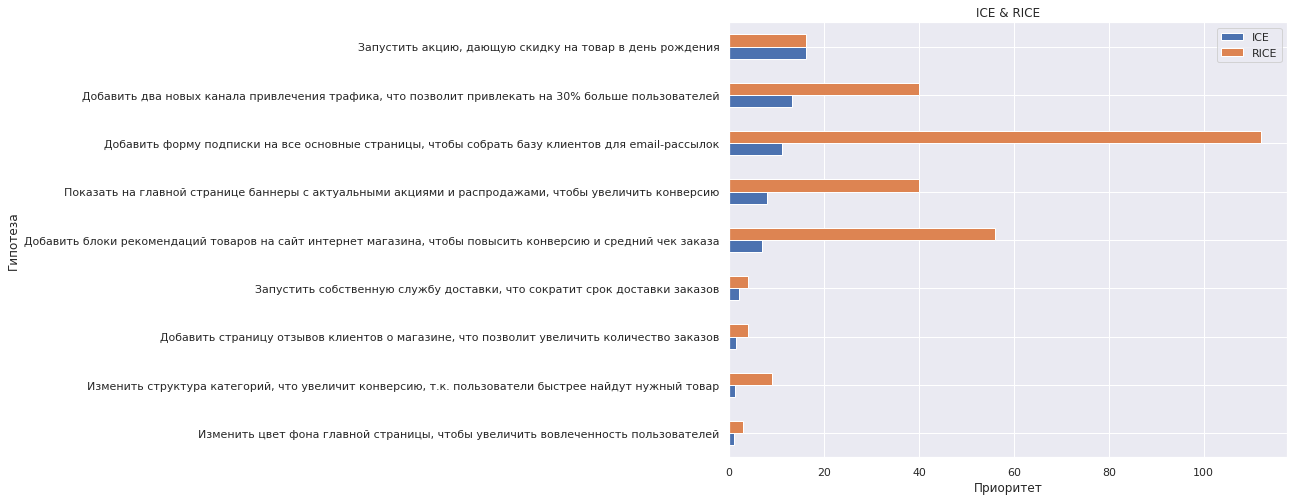

In [25]:
#построим визуализацию
ax = hypothesis[['hypothesis', 'ICE', 'RICE']].set_index('hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE & RICE')
plt.show()

* ***Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.***

При применении приотизации RICE на первое место вышла гипотеза под номером 7, так произошло потому что применяются разные формулы расчета. Формула RICE включает в себя количество пользователей, которых затронут изменения. И это не маловажный фактор. В принципе, гипотезы под номерами 7 и 0 находятся в тройке лидеров в любом из методов расчета. 

## Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

In [26]:
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [27]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [28]:
#проверим не попали ли пользователи в две группы
doubles = orders.groupby(['visitorid']).agg({'group' : 'nunique', 'transactionid' : 'count', 'revenue' : 'sum'}).reset_index()
print(f'Пользователей, попавших в обе группы: {doubles[doubles.group != 1]["visitorid"].count()}')
print(f"Сумма заказов этих пользователей {doubles[doubles.group != 1]['revenue'].sum()}")
print(f"Количество их заказов {doubles[doubles.group != 1]['transactionid'].sum()}")

Пользователей, попавших в обе группы: 58
Сумма заказов этих пользователей 1558935
Количество их заказов 181


In [29]:
#посчитаем общуу сумму заказов
print(f"Общая сумма заказов {orders[orders.group != 1]['revenue'].sum()}")

Общая сумма заказов 9992563


58 покупателей попали в обе группы, они совершили 181 заказ на сумму 1558935, что составило 15% от всей суммы заказов. Их можно было бы удалить из двух групп, но в этой ситуации возможно удаление только в orders, потому как там есть visitorid, в таблице visitors нет ID пользователей. Поэтому оставим этих пользователей. 

In [30]:
datesGroups = orders[['date','group']].drop_duplicates() 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulativeData.head(5)) 


         date group  orders  buyers  revenue  visitors
0  2019-08-01  A     24      20      148579   719     
1  2019-08-01  B     21      20      101217   713     
2  2019-08-02  A     44      38      242401   1338    
3  2019-08-02  B     45      43      266748   1294    
4  2019-08-03  A     68      62      354874   1845    


In [31]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [32]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


* ***Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.***

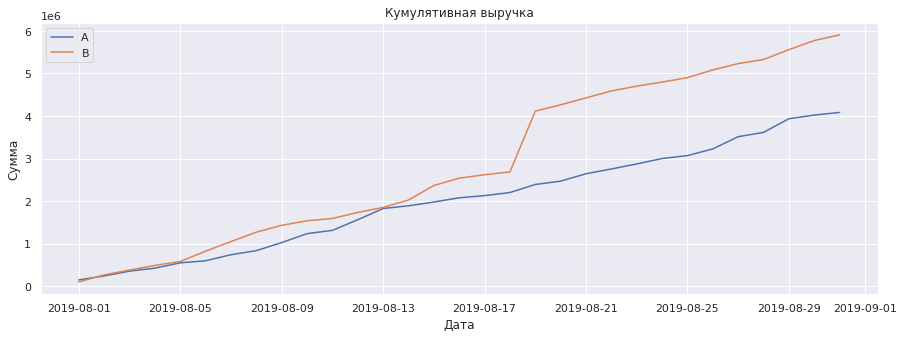

In [33]:
# Строим график выручки группы А
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Сумма')
plt.title('Кумулятивная выручка')
plt.show()

С самого начала теста выручка растет в двух группах плавно. В середине теста(18-го августа) сегмент В вырвался вперед и продолжил лидировать до конца теста. Это могло вызвать увеличение или числа заказов или сумм покупок. Необходимо посмотреть динамику среднего чека. 

* ***Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.***

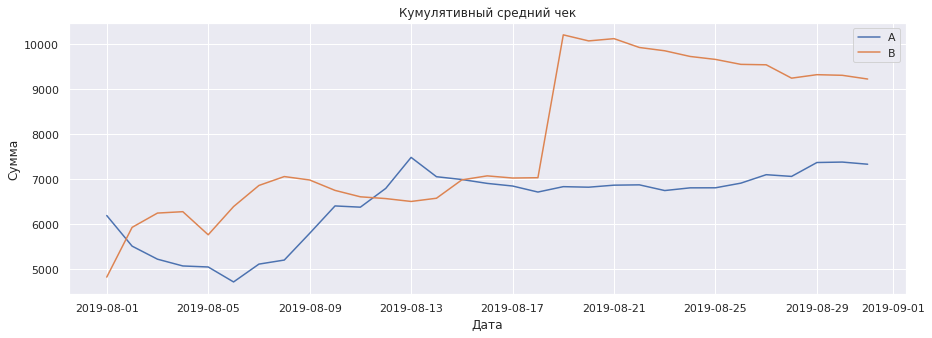

In [34]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Сумма')
plt.title('Кумулятивный средний чек')
plt.show()

Средний чек в группе А вырос и стабилизировался. В группе В зафиксирован резский скачек, который плавно снижается к концу теста. Вероятно в группе В были какие-то крупные заказы.

* ***Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.***

In [35]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

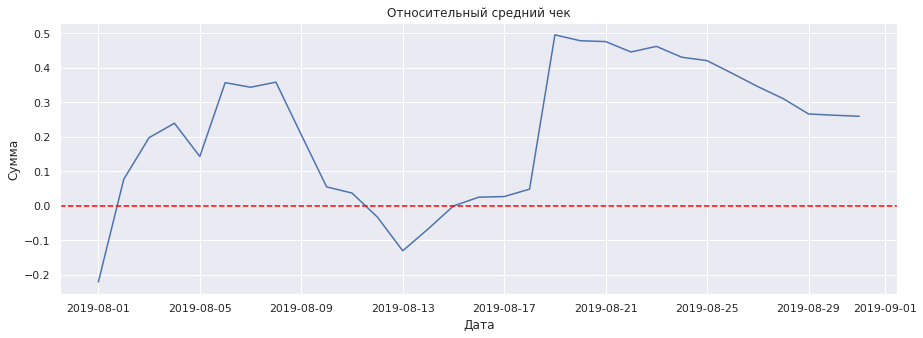

In [36]:
# cтроим отношение средних чеков
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Относительный средний чек')
plt.xlabel('Дата')
plt.ylabel('Сумма');

Зафиксировано 2 скачка. Первый с 6-8 августа, второй 20-го августа. В эти даты были совершены самые дорогие заказы. 

* ***Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.***

In [37]:
# считаем Количество заказов
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [38]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

In [39]:
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

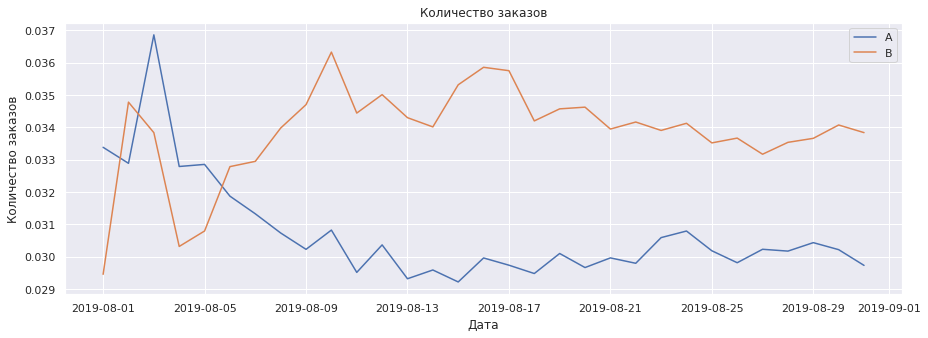

In [40]:
# строим графики
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Количество заказов')
plt.xlabel('Дата')
plt.ylabel('Количество заказов');

Группы стартовали с очень разных значений, но затем группа A постепенно уменьшилась, а группа B стабилизировалась. Абсолютное значение колебания в начале и в конце теста в пределах 3%. 

* ***Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.***

In [41]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

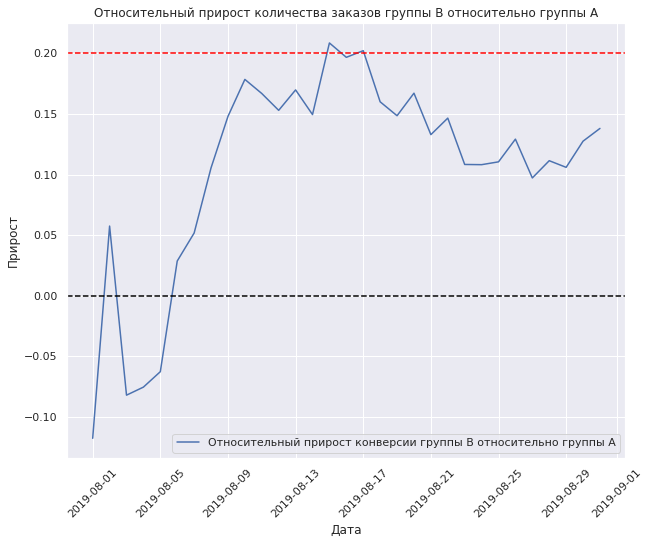

In [42]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='red', linestyle='--')
plt.title('Относительный прирост количества заказов группы B относительно группы A')
plt.xlabel('Дата')
plt.ylabel('Прирост')
plt.xticks(rotation=45);

Группа A проигрывает группе B на протяжении почти всего теста. В начале теста конверсия уходит в минус, но это совсем короткий срок, буквально 2 дня. 

* ***Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.***

In [43]:
ordersByUsers= orders.groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})\
                         .rename(columns={'transactionid':'orders', 'visitorid':'userId'})
ordersByUsers.head()

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


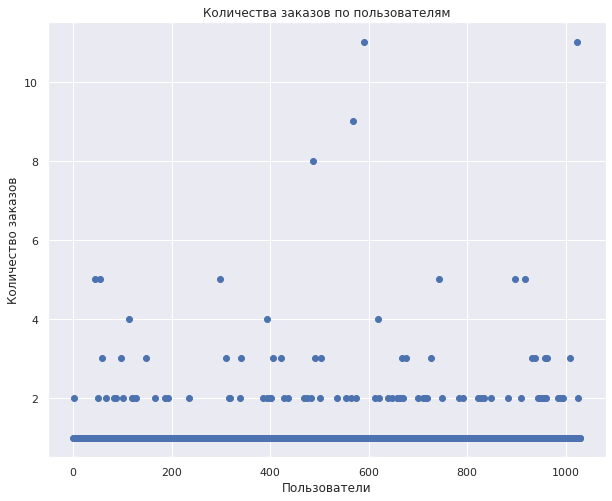

In [44]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов');

Большинсво пользователей сделали 1 заказ. 2 пользователя сделали больше 10.

* ***Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.***

In [45]:
print('90 перцентиль: %.2f' % (np.percentile(ordersByUsers['orders'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(ordersByUsers['orders'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(ordersByUsers['orders'], [99])))

90 перцентиль: 1.00
95 перцентиль: 2.00
99 перцентиль: 4.00


Не более 5% пользователей совершили больше 2-х заказов. И не более 1% пользователей более 4-х. Аномальным признаем покупателей совершивших более 4-х заказов.

* ***Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.***

In [46]:
display(orders.sort_values(by='revenue', ascending=False).head(10))

,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


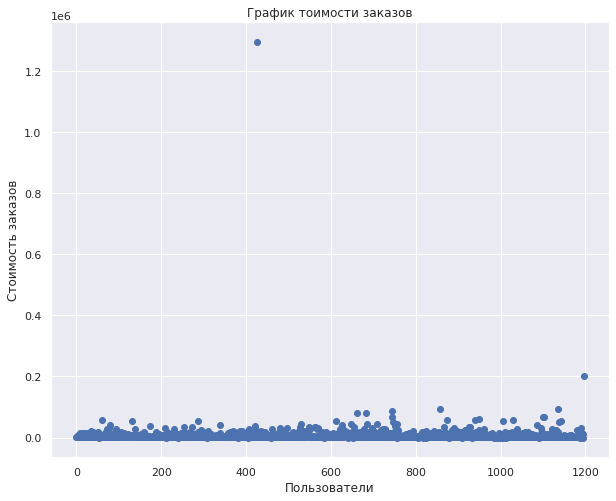

In [47]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График тоимости заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов'); 

Есть 2 выброса, это заказ на сумму 1294500 и 202740. Построим график без выбросов.

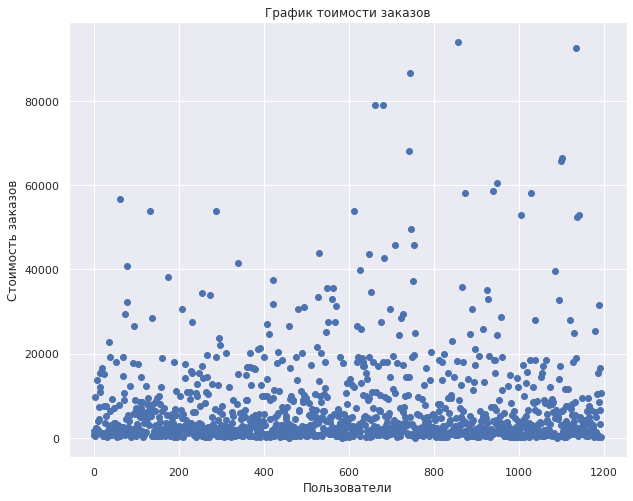

In [48]:
ny=orders.query('revenue <= 93940')
x_values = pd.Series(range(0, len(ny['revenue'])))
plt.scatter(x_values, ny['revenue'])
plt.title('График тоимости заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов'); 

В большинстве своем сумма заказов составляет 28000, все то, что выше, единичные случаи. 

* ***Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.***

In [49]:
print('90 перцентиль: %.2f' % (np.percentile(orders['revenue'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))

90 перцентиль: 18168.00
95 перцентиль: 28000.00
99 перцентиль: 58233.20


Все, что за 95 перцентилем — аномально.

* ***Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.***

In [50]:
orders.head(5)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть. Уровень значимости равен 0.05.

In [51]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [52]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [53]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [54]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [55]:
print('p-value:',"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('выигрыш группы B:',"{0:.3f}".format((ordersBDaily['ordersPerDateB'].sum()/visitorsBDaily['visitorsPerDateB'].sum())/(ordersADaily['ordersPerDateA'].sum()/visitorsADaily['visitorsPerDateA'].sum())-1))

p-value: 0.01679
выигрыш группы B: 0.138


По "сырым" данным различия между группами A и B есть: p-value меньше 0.05, и нулевую гипотезу о том, что статистически значимых различий в количестве заказов между группами нет, следует отвергнуть. Относительный выигрыш группы B равен 14%.

* ***Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.***

Найдём относительные различия в среднем чеке между группами: Нулевая - статистически значимых различий в среднем чеке между группами нет. Альтернативная - статистически значимые различия есть.

In [56]:
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('выигрыш группы B:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.729
выигрыш группы B: 0.259


По сырым данным различий между средними чеками нет: P-value значительно больше 0.05, значит, причин отвергать нулевую гипотезу, нет. Средний чек группы B значительно выше среднего чека группы A.

* ***Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.***

Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. 

In [57]:
#Узнаем, сколько всего аномальных пользователей.
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('Количество аномальных пользователей:', abnormalUsers.shape[0])

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
dtype: int64
Количество аномальных пользователей: 59


Всего 59 аномальных пользователей. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Гипотезы: Нулевая - статистически значимых различий в среднем количестве заказов на посетителя между группами нет. Альтернативная - статистически значимые различия есть.

In [58]:
# подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [59]:
#Применим статистический критерий Манна-Уитни к полученным выборкам
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('выигрыш группы B:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.018
выигрыш группы B: 0.145


По "очищенным" данным различия между группами A и B есть: p-value заметно меньше 0.05, и нулевую гипотезу о том, что статистически значимых различий в количестве заказов между группами нет, следует отвергнуть. Относительный выигрыш группы B увеличился и равен 15%, а был 14%.

* ***Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.***

Найдём статистическую значимость различий в среднем чеке заказа между группами. Гипотезы: нулевая - статистически значимых различий в среднем чеке между группами нет. Альтернативная - статистически значимые различия есть.

In [60]:
print('p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('выигрыш группы B:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.961
выигрыш группы B: -0.014


P-value остался значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, по-прежнему нет. А вот средний чек группы B без выбросов стал ниже среднего чека группы A, хотя и ненамного.

* ***Примите решение по результатам теста и объясните его.***

* Есть статистически значимое различие в количестве заказов между группами как по сырым данным, так и после фильтрации аномалий.
* Статистически значимое различие в среднем чеке по сырым данным и после фильтрации нет.
* График различия количества заказов между группами показывает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
* В целом тест можно остановить. Мы увидели прирост количества заказов в группе B, но на среднем чеке проверяемая гипотеза не сказалась.